In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid (x):
    return 1/(1 + np.exp(-x))

def xor_net(x1, x2, weights):
  hidden_layer_activation = np.dot(inputs,weights[0])
  hidden_layer_activation += weights[1]
  hidden_layer_output = sigmoid(hidden_layer_activation)
  output_layer_activation = np.dot(hidden_layer_output,weights[2])
  output_layer_activation += weights[3]
  predicted_output = sigmoid(output_layer_activation)

  return predicted_output, hidden_layer_output

def sigmoid_derivative(x):
    return x * (1 - x)

def mse(weights):
  output = xor_net(x1,x2,weights)[0]

  array1 = expected_output
  array2 = output

  difference_array = np.subtract(array1, array2)
  squared_array = np.square(difference_array)
  mse = squared_array

  return mse

#Backpropagation
def gradmse(weights, predicted_output, hidden_layer_output):
  error = expected_output - predicted_output
  d_predicted_output = error * sigmoid_derivative(predicted_output)
  
  error_hidden_layer = d_predicted_output.dot(weights[2].T)
  d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

  return d_predicted_output, d_hidden_layer

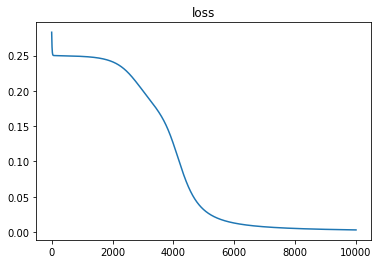

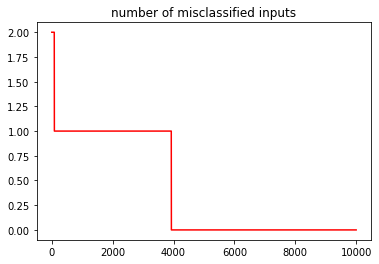

In [3]:
# vanilla approach
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
expected_output = np.array([[0],[1],[1],[0]])

inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 2,2,1
hidden_weights = np.random.uniform(size=(inputLayerNeurons,hiddenLayerNeurons))
hidden_bias =np.random.uniform(size=(1,hiddenLayerNeurons))
output_weights = np.random.uniform(size=(hiddenLayerNeurons,outputLayerNeurons))
output_bias = np.random.uniform(size=(1,outputLayerNeurons))

weights = [hidden_weights,hidden_bias,output_weights,output_bias]
x1 = inputs[0]
x2 = inputs[1]

lr = 0.1

losses = []
misclasses = []
for epoch in range(10000):
  predicted_output, hidden_layer_output = xor_net(x1, x2, weights)
  d_predicted_output, d_hidden_layer = gradmse(weights, predicted_output, hidden_layer_output)

  output_weights += hidden_layer_output.T.dot(d_predicted_output) * lr
  output_bias += np.sum(d_predicted_output,axis=0,keepdims=True) * lr
  hidden_weights += inputs.T.dot(d_hidden_layer) * lr
  hidden_bias += np.sum(d_hidden_layer,axis=0,keepdims=True) * lr

  loss = mse(weights).mean()
  losses.append(loss)

  misclass = (xor_net(x1,x2,weights)[0]+0.5).astype(int) != expected_output
  misclasses.append(sum(sum(misclass)))

plt.plot(losses)
plt.title("loss")
plt.show()
plt.plot(misclasses,c='r')
plt.title("number of misclassified inputs")
plt.show()

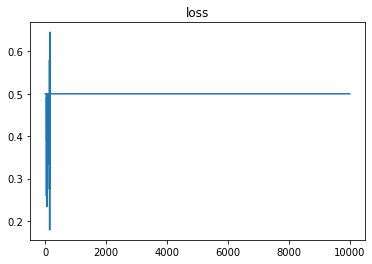

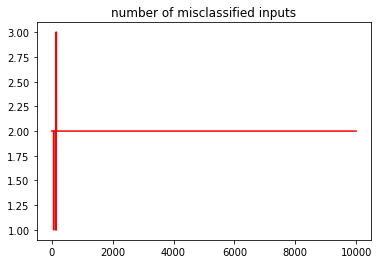

In [4]:
# high learning rate
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
expected_output = np.array([[0],[1],[1],[0]])

inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 2,2,1
hidden_weights = np.random.uniform(size=(inputLayerNeurons,hiddenLayerNeurons))
hidden_bias =np.random.uniform(size=(1,hiddenLayerNeurons))
output_weights = np.random.uniform(size=(hiddenLayerNeurons,outputLayerNeurons))
output_bias = np.random.uniform(size=(1,outputLayerNeurons))

weights = [hidden_weights,hidden_bias,output_weights,output_bias]
x1 = inputs[0]
x2 = inputs[1]

lr = 50

losses = []
misclasses = []
for epoch in range(10000):
  predicted_output, hidden_layer_output = xor_net(x1, x2, weights)
  d_predicted_output, d_hidden_layer = gradmse(weights, predicted_output, hidden_layer_output)

  output_weights += hidden_layer_output.T.dot(d_predicted_output) * lr
  output_bias += np.sum(d_predicted_output,axis=0,keepdims=True) * lr
  hidden_weights += inputs.T.dot(d_hidden_layer) * lr
  hidden_bias += np.sum(d_hidden_layer,axis=0,keepdims=True) * lr

  loss = mse(weights).mean()
  losses.append(loss)

  misclass = (xor_net(x1,x2,weights)[0]+0.5).astype(int) != expected_output
  misclasses.append(sum(sum(misclass)))

plt.plot(losses)
plt.title("loss")
plt.show()
plt.plot(misclasses,c='r')
plt.title("number of misclassified inputs")
plt.show()

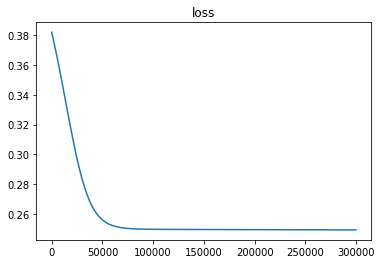

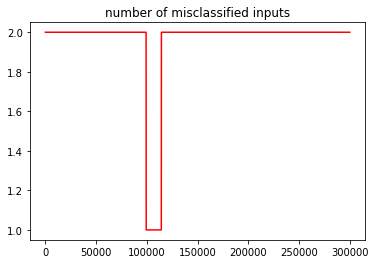

In [5]:
# low learning rate
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
expected_output = np.array([[0],[1],[1],[0]])

inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 2,2,1
hidden_weights = np.random.uniform(size=(inputLayerNeurons,hiddenLayerNeurons))
hidden_bias =np.random.uniform(size=(1,hiddenLayerNeurons))
output_weights = np.random.uniform(size=(hiddenLayerNeurons,outputLayerNeurons))
output_bias = np.random.uniform(size=(1,outputLayerNeurons))

weights = [hidden_weights,hidden_bias,output_weights,output_bias]
x1 = inputs[0]
x2 = inputs[1]

lr = 0.0001

losses = []
misclasses = []
for epoch in range(300000):
  predicted_output, hidden_layer_output = xor_net(x1, x2, weights)
  d_predicted_output, d_hidden_layer = gradmse(weights, predicted_output, hidden_layer_output)

  output_weights += hidden_layer_output.T.dot(d_predicted_output) * lr
  output_bias += np.sum(d_predicted_output,axis=0,keepdims=True) * lr
  hidden_weights += inputs.T.dot(d_hidden_layer) * lr
  hidden_bias += np.sum(d_hidden_layer,axis=0,keepdims=True) * lr

  loss = mse(weights).mean()
  losses.append(loss)

  misclass = (xor_net(x1,x2,weights)[0]+0.5).astype(int) != expected_output
  misclasses.append(sum(sum(misclass)))

plt.plot(losses)
plt.title("loss")
plt.show()
plt.plot(misclasses,c='r')
plt.title("number of misclassified inputs")
plt.show()

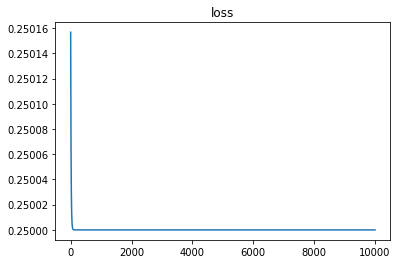

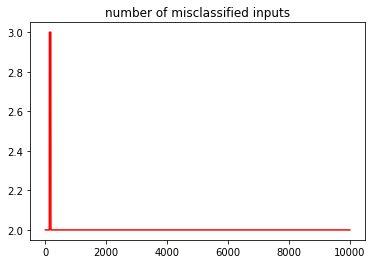

In [6]:
# narrow range initialization
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
expected_output = np.array([[0],[1],[1],[0]])

low = -0.1
high = 0.1

inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 2,2,1
hidden_weights = np.random.uniform(low=low, high=high, size=(inputLayerNeurons,hiddenLayerNeurons))
hidden_bias =np.random.uniform(low=low, high=high, size=(1,hiddenLayerNeurons))
output_weights = np.random.uniform(low=low, high=high, size=(hiddenLayerNeurons,outputLayerNeurons))
output_bias = np.random.uniform(low=low, high=high, size=(1,outputLayerNeurons))

weights = [hidden_weights,hidden_bias,output_weights,output_bias]
x1 = inputs[0]
x2 = inputs[1]

lr = 0.1

losses = []
misclasses = []
for epoch in range(10000):
  predicted_output, hidden_layer_output = xor_net(x1, x2, weights)
  d_predicted_output, d_hidden_layer = gradmse(weights, predicted_output, hidden_layer_output)

  output_weights += hidden_layer_output.T.dot(d_predicted_output) * lr
  output_bias += np.sum(d_predicted_output,axis=0,keepdims=True) * lr
  hidden_weights += inputs.T.dot(d_hidden_layer) * lr
  hidden_bias += np.sum(d_hidden_layer,axis=0,keepdims=True) * lr

  loss = mse(weights).mean()
  losses.append(loss)

  misclass = (xor_net(x1,x2,weights)[0]+0.5).astype(int) != expected_output
  misclasses.append(sum(sum(misclass)))

plt.plot(losses)
plt.title("loss")
plt.show()
plt.plot(misclasses,c='r')
plt.title("number of misclassified inputs")
plt.show()

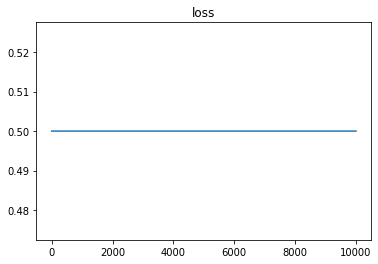

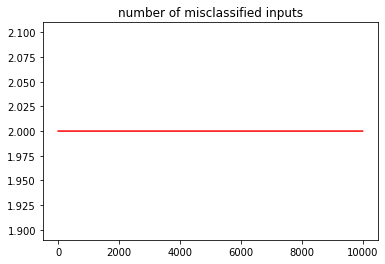

In [7]:
# wide range initialization
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
expected_output = np.array([[0],[1],[1],[0]])

low = -100
high = 100

inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 2,2,1
hidden_weights = np.random.uniform(low=low, high=high, size=(inputLayerNeurons,hiddenLayerNeurons))
hidden_bias =np.random.uniform(low=low, high=high, size=(1,hiddenLayerNeurons))
output_weights = np.random.uniform(low=low, high=high, size=(hiddenLayerNeurons,outputLayerNeurons))
output_bias = np.random.uniform(low=low, high=high, size=(1,outputLayerNeurons))

weights = [hidden_weights,hidden_bias,output_weights,output_bias]
x1 = inputs[0]
x2 = inputs[1]

lr = 0.1

losses = []
misclasses = []
for epoch in range(10000):
  predicted_output, hidden_layer_output = xor_net(x1, x2, weights)
  d_predicted_output, d_hidden_layer = gradmse(weights, predicted_output, hidden_layer_output)

  output_weights += hidden_layer_output.T.dot(d_predicted_output) * lr
  output_bias += np.sum(d_predicted_output,axis=0,keepdims=True) * lr
  hidden_weights += inputs.T.dot(d_hidden_layer) * lr
  hidden_bias += np.sum(d_hidden_layer,axis=0,keepdims=True) * lr

  loss = mse(weights).mean()
  losses.append(loss)

  misclass = (xor_net(x1,x2,weights)[0]+0.5).astype(int) != expected_output
  misclasses.append(sum(sum(misclass)))

plt.plot(losses)
plt.title("loss")
plt.show()
plt.plot(misclasses,c='r')
plt.title("number of misclassified inputs")
plt.show()

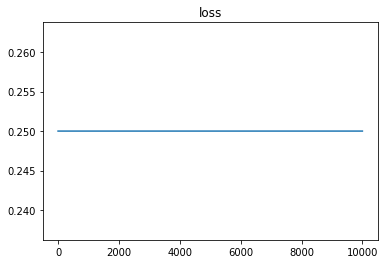

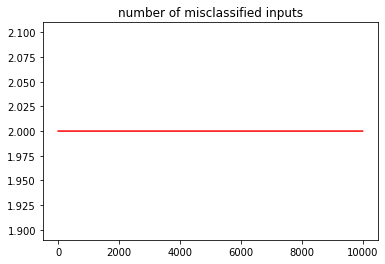

In [8]:
# zero initialization
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
expected_output = np.array([[0],[1],[1],[0]])

inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 2,2,1
hidden_weights = np.zeros(shape=(inputLayerNeurons,hiddenLayerNeurons))
hidden_bias =np.zeros(shape=(1,hiddenLayerNeurons))
output_weights = np.zeros(shape=(hiddenLayerNeurons,outputLayerNeurons))
output_bias = np.zeros(shape=(1,outputLayerNeurons))

weights = [hidden_weights,hidden_bias,output_weights,output_bias]
x1 = inputs[0]
x2 = inputs[1]

lr = 0.1

losses = []
misclasses = []
for epoch in range(10000):
  predicted_output, hidden_layer_output = xor_net(x1, x2, weights)
  d_predicted_output, d_hidden_layer = gradmse(weights, predicted_output, hidden_layer_output)

  output_weights += hidden_layer_output.T.dot(d_predicted_output) * lr
  output_bias += np.sum(d_predicted_output,axis=0,keepdims=True) * lr
  hidden_weights += inputs.T.dot(d_hidden_layer) * lr
  hidden_bias += np.sum(d_hidden_layer,axis=0,keepdims=True) * lr

  loss = mse(weights).mean()
  losses.append(loss)

  misclass = (xor_net(x1,x2,weights)[0]+0.5).astype(int) != expected_output
  misclasses.append(sum(sum(misclass)))

plt.plot(losses)
plt.title("loss")
plt.show()
plt.plot(misclasses,c='r')
plt.title("number of misclassified inputs")
plt.show()

Apparently, it's hard (not able) to find the lossless weights with very high/low(zero) initialization. If all the weights are initialized with 0, the derivative with respect to loss function is the same for each node weight in $weights$, thus all weights have the same value in subsequent iterations. This makes hidden units symmetric and continues for all the n iterations.

In [9]:
# lazy approach
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
expected_output = np.array([[0],[1],[1],[0]])

inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 2,2,1

lr = 0.1

losses = []
misclasses = []
epoch_count = 0

low = -7
high = 7
for i in range(5):
  while True:

    hidden_weights = np.random.uniform(low=low, high=high, size=(inputLayerNeurons,hiddenLayerNeurons))
    hidden_bias =np.random.uniform(low=low, high=high, size=(1,hiddenLayerNeurons))
    output_weights = np.random.uniform(low=low, high=high, size=(hiddenLayerNeurons,outputLayerNeurons))
    output_bias = np.random.uniform(low=low, high=high, size=(1,outputLayerNeurons))

    weights = [hidden_weights,hidden_bias,output_weights,output_bias]
    x1 = inputs[0]
    x2 = inputs[1]

    predicted_output, hidden_layer_output = xor_net(x1, x2, weights)
    d_predicted_output, d_hidden_layer = gradmse(weights, predicted_output, hidden_layer_output)

    epoch_count = epoch_count +1

    if ((np.array_equal((xor_net(x1,x2,weights)[0]+0.5).astype(int), expected_output))):
      break

  print(epoch_count)

513
994
14485
15445
17433


{1823, 4559, 103, 1110, 1300} sets of random weights was tried before I finally finded a set of proper weights in 5 repeats, when all weights generated randomly in range $[-7,7)$. But it could take about sevearl several ten minutes to find a suitable weights if you set a smaller range for random number generator. Therefore, it is curecial to initial weights properly in the first place.

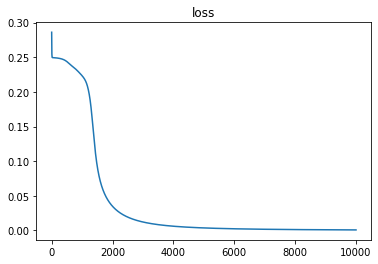

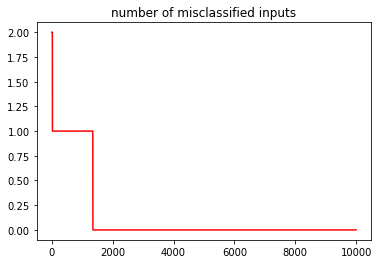

In [10]:
# tanh activation
def tanh (x):
    return np.tanh(x)

def xor_net(x1, x2, weights):
  hidden_layer_activation = np.dot(inputs,weights[0])
  hidden_layer_activation += weights[1]
  hidden_layer_output = sigmoid(hidden_layer_activation)
  output_layer_activation = np.dot(hidden_layer_output,weights[2])
  output_layer_activation += weights[3]
  predicted_output = sigmoid(output_layer_activation)

  return predicted_output, hidden_layer_output

def tanh_derivative(x):
    t=np.tanh(x)
    return 1-t**2

def mse(weights):
  output = xor_net(x1,x2,weights)[0]

  array1 = expected_output
  array2 = output

  difference_array = np.subtract(array1, array2)
  squared_array = np.square(difference_array)
  mse = squared_array

  return mse

#Backpropagation
def gradmse(weights, predicted_output, hidden_layer_output):
  error = expected_output - predicted_output
  d_predicted_output = error * tanh_derivative(predicted_output)
  
  error_hidden_layer = d_predicted_output.dot(weights[2].T)
  d_hidden_layer = error_hidden_layer * tanh_derivative(hidden_layer_output)

  return d_predicted_output, d_hidden_layer

inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
expected_output = np.array([[0],[1],[1],[0]])

inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 2,2,1
hidden_weights = np.random.uniform(size=(inputLayerNeurons,hiddenLayerNeurons))
hidden_bias =np.random.uniform(size=(1,hiddenLayerNeurons))
output_weights = np.random.uniform(size=(hiddenLayerNeurons,outputLayerNeurons))
output_bias = np.random.uniform(size=(1,outputLayerNeurons))

weights = [hidden_weights,hidden_bias,output_weights,output_bias]
x1 = inputs[0]
x2 = inputs[1]

lr = 0.1

losses = []
misclasses = []
for epoch in range(10000):
  predicted_output, hidden_layer_output = xor_net(x1, x2, weights)
  d_predicted_output, d_hidden_layer = gradmse(weights, predicted_output, hidden_layer_output)

  output_weights += hidden_layer_output.T.dot(d_predicted_output) * lr
  output_bias += np.sum(d_predicted_output,axis=0,keepdims=True) * lr
  hidden_weights += inputs.T.dot(d_hidden_layer) * lr
  hidden_bias += np.sum(d_hidden_layer,axis=0,keepdims=True) * lr

  loss = mse(weights).mean()
  losses.append(loss)

  misclass = (xor_net(x1,x2,weights)[0]+0.5).astype(int) != expected_output
  misclasses.append(sum(sum(misclass)))

plt.plot(losses)
plt.title("loss")
plt.show()
plt.plot(misclasses,c='r')
plt.title("number of misclassified inputs")
plt.show()

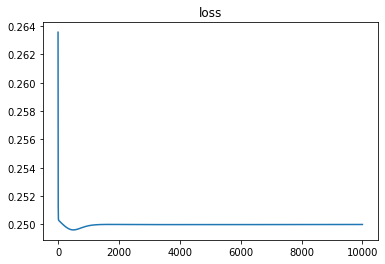

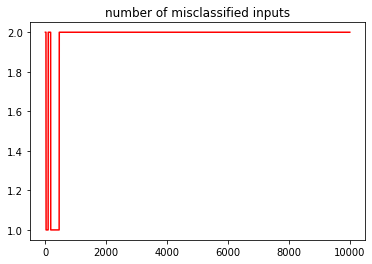

In [11]:
# relu activation
def relu (x):
    return np.maximum(0,x)

def xor_net(x1, x2, weights):
  hidden_layer_activation = np.dot(inputs,weights[0])
  hidden_layer_activation += weights[1]
  hidden_layer_output = sigmoid(hidden_layer_activation)
  output_layer_activation = np.dot(hidden_layer_output,weights[2])
  output_layer_activation += weights[3]
  predicted_output = sigmoid(output_layer_activation)

  return predicted_output, hidden_layer_output

def tanh_derivative(x):
    t = np.maximum(0,x)
    if (np.all((t == 0))):
      return 0
    else:
      return 1

def mse(weights):
  output = xor_net(x1,x2,weights)[0]

  array1 = expected_output
  array2 = output

  difference_array = np.subtract(array1, array2)
  squared_array = np.square(difference_array)
  mse = squared_array

  return mse

#Backpropagation
def gradmse(weights, predicted_output, hidden_layer_output):
  error = expected_output - predicted_output
  d_predicted_output = error * tanh_derivative(predicted_output)
  
  error_hidden_layer = d_predicted_output.dot(weights[2].T)
  d_hidden_layer = error_hidden_layer * tanh_derivative(hidden_layer_output)

  return d_predicted_output, d_hidden_layer

inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
expected_output = np.array([[0],[1],[1],[0]])

inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 2,2,1
hidden_weights = np.random.uniform(size=(inputLayerNeurons,hiddenLayerNeurons))
hidden_bias =np.random.uniform(size=(1,hiddenLayerNeurons))
output_weights = np.random.uniform(size=(hiddenLayerNeurons,outputLayerNeurons))
output_bias = np.random.uniform(size=(1,outputLayerNeurons))

weights = [hidden_weights,hidden_bias,output_weights,output_bias]
x1 = inputs[0]
x2 = inputs[1]

lr = 0.1

losses = []
misclasses = []
for epoch in range(10000):
  predicted_output, hidden_layer_output = xor_net(x1, x2, weights)
  d_predicted_output, d_hidden_layer = gradmse(weights, predicted_output, hidden_layer_output)

  output_weights += hidden_layer_output.T.dot(d_predicted_output) * lr
  output_bias += np.sum(d_predicted_output,axis=0,keepdims=True) * lr
  hidden_weights += inputs.T.dot(d_hidden_layer) * lr
  hidden_bias += np.sum(d_hidden_layer,axis=0,keepdims=True) * lr

  loss = mse(weights).mean()
  losses.append(loss)

  misclass = (xor_net(x1,x2,weights)[0]+0.5).astype(int) != expected_output
  misclasses.append(sum(sum(misclass)))

plt.plot(losses)
plt.title("loss")
plt.show()
plt.plot(misclasses,c='r')
plt.title("number of misclassified inputs")
plt.show()